In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\Administrator\Desktop\Datatechcon\Python & ML\Python EDA & ML Model Ass\digital_ads.csv")

In [3]:
df.head()

,campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion
0,3916,20-24,M,15,7350,1,1.43,2
1,3917,20-24,M,16,17861,2,1.82,2
2,3920,20-24,M,20,693,0,0.00,1
3,3928,20-24,M,28,4259,1,1.25,1
4,3928,20-24,M,28,4133,1,1.29,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   campaign_id       1000 non-null   int64  
 1   age               1000 non-null   object 
 2   gender            1000 non-null   object 
 3   interest          1000 non-null   int64  
 4   Impressions       1000 non-null   int64  
 5   Clicks            1000 non-null   int64  
 6   Spent             1000 non-null   float64
 7   Total_Conversion  1000 non-null   int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 62.6+ KB


There are no missing values in this dataset.

In [5]:
#summary statistics for the dataset
df.describe()

,campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion
count,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000
mean,5054.935000,25.819000,1.586595e+05,27.122000,42.954290,2.551000
std,1754.190189,15.642408,2.995563e+05,50.320187,79.542986,4.235013
min,836.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000
25%,4552.000000,16.000000,5.036000e+03,1.000000,1.290000,1.000000
50%,4646.500000,22.000000,2.901200e+04,5.000000,8.345000,1.000000
75%,5649.500000,29.000000,1.729115e+05,29.000000,46.480000,2.000000
max,9859.000000,66.000000,3.052003e+06,421.000000,639.950000,60.000000


In [6]:
#checking for duplicates 
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

There are no duplicates in our dataset.

In [7]:
#checking for columns that are numeric either float or int
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion
0,3916,15,7350,1,1.43,2
1,3917,16,17861,2,1.82,2
2,3920,20,693,0,0.00,1
3,3928,28,4259,1,1.25,1
4,3928,28,4133,1,1.29,1


In [8]:
#checking for columns that are text or categorical
df_str = df.select_dtypes(include = ['object'])
df_str.head()

,age,gender
0,20-24,M
1,20-24,M
2,20-24,M
3,20-24,M
4,20-24,M


In [9]:
#converting column names to lower case
lowercolumn = []
for i in range(len(df.columns)):
    lowercolumn.append(df.columns[i].replace('_', ' ').lower())
df.columns = lowercolumn

In [10]:
df

,campaign id,age,gender,interest,impressions,clicks,spent,total conversion
0,3916,20-24,M,15,7350,1,1.43,2
1,3917,20-24,M,16,17861,2,1.82,2
2,3920,20-24,M,20,693,0,0.00,1
3,3928,20-24,M,28,4259,1,1.25,1
4,3928,20-24,M,28,4133,1,1.29,1
...,...,...,...,...,...,...,...,...
995,4722,35-39,F,10,1358324,346,465.08,8
996,4723,35-39,F,15,662249,163,234.94,2
997,4723,35-39,F,15,559554,139,195.08,2
998,4724,35-39,F,16,320757,68,104.69,2


In [11]:
#check for columns that have relationship between them
df[df.columns[1 : ]].corr()

,interest,impressions,clicks,spent,total conversion
interest,1.000000,-0.068033,-0.059114,-0.062194,-0.067472
impressions,-0.068033,1.000000,0.954466,0.976117,0.839176
clicks,-0.059114,0.954466,1.000000,0.992614,0.726883
spent,-0.062194,0.976117,0.992614,1.000000,0.760439
total conversion,-0.067472,0.839176,0.726883,0.760439,1.000000


There is a strong positive correlation between 'impressions' and 'clicks', 'spent' and 'clicks', 'impressions' and 'spent', 'impressions' and 'total_conversion', 'total_conversion' and 'clicks', and 'spent' and 'total_conversion'.

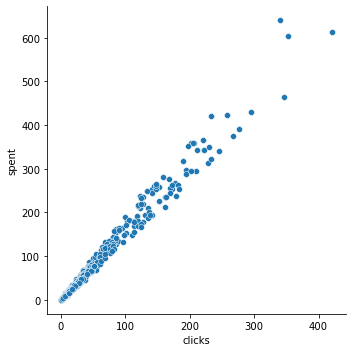

In [12]:
sns.relplot(x='clicks', y='spent', data=df)

- There's a strong positive correlation between clicks and amount spent on ads.

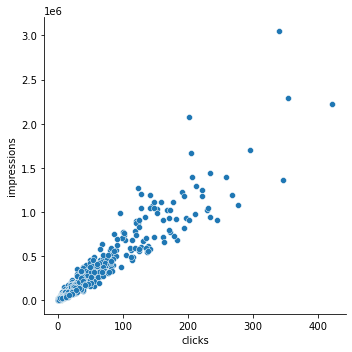

In [13]:
sns.relplot(x='clicks', y='impressions', data=df)

- There's a strong positive correlation between clicks and impressions.

(array([0, 1, 2, 3]),
 [Text(0, 0, '20-24'),
  Text(1, 0, '25-29'),
  Text(2, 0, '30-34'),
  Text(3, 0, '35-39')])

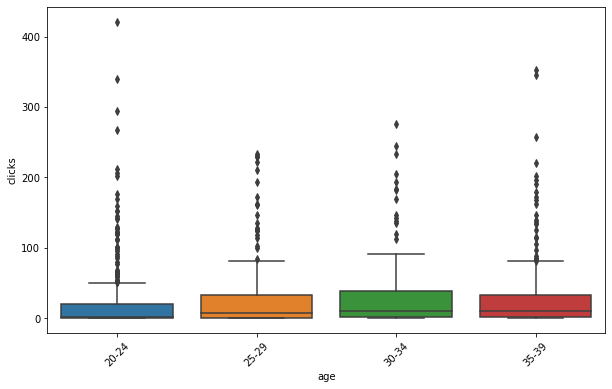

In [14]:
#boxplot to visualize an identify outliers
plt.figure(figsize = (10,6))
ax = sns.boxplot(x = 'age', y = 'clicks', data = df )
plt.setp(ax.artists, alpha = .5 , linewidth = 2, edgecolor = 'k')
plt.xticks(rotation = 45)

#### Insights

- Age_group 30-34 accounted for the highest number of clicks while age_group 20-24 accounted for the least number of clicks.

- All the age_groups have positive outliers and none has negative outliers. However, age_group 20-24 has the most outliers of all the age_groups.

- There's a higher likelihood to get more clicks from age_group 30-34 and 25-29.

(array([0, 1, 2, 3]),
 [Text(0, 0, '20-24'),
  Text(1, 0, '25-29'),
  Text(2, 0, '30-34'),
  Text(3, 0, '35-39')])

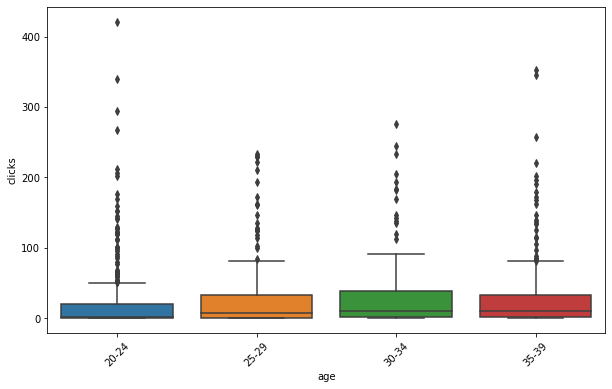

In [15]:
#boxplot to visualize an identify outliers
plt.figure(figsize = (10,6))
ax = sns.boxplot(x = 'age', y = 'clicks', data = df )
plt.setp(ax.artists, alpha = .5 , linewidth = 2, edgecolor = 'k')
plt.xticks(rotation = 45)

In [16]:
#counting the number of values in the different age_group.
df['age'].value_counts()

20-24    404
25-29    225
35-39    186
30-34    185
Name: age, dtype: int64

In [17]:
#creating a temporary dataframe
Tempdf = df
Tempdf

,campaign id,age,gender,interest,impressions,clicks,spent,total conversion
0,3916,20-24,M,15,7350,1,1.43,2
1,3917,20-24,M,16,17861,2,1.82,2
2,3920,20-24,M,20,693,0,0.00,1
3,3928,20-24,M,28,4259,1,1.25,1
4,3928,20-24,M,28,4133,1,1.29,1
...,...,...,...,...,...,...,...,...
995,4722,35-39,F,10,1358324,346,465.08,8
996,4723,35-39,F,15,662249,163,234.94,2
997,4723,35-39,F,15,559554,139,195.08,2
998,4724,35-39,F,16,320757,68,104.69,2


### Coverting Categorical(Age) to Numeric

In [18]:
#create a dictionary for age by assigning each age group its average age.
age_dict = {'20-24' : 22,'25-29':27 ,'30-34' : 32,'35-39' : 37 }

In [19]:
#convert the current age into new age
Tempdf['age'] = Tempdf['age'].apply(lambda x: age_dict[x])

In [20]:
#convert variable to interger
Tempdf['age'] = np.array(Tempdf['age']).astype('int64')

In [21]:
#counting the unique values in the tempdf
Tempdf['age'].value_counts()

22    404
27    225
37    186
32    185
Name: age, dtype: int64

### Converting Categorical(gender) to Numeric(0 & 1)

In [22]:
df['gender'].value_counts()

M    549
F    451
Name: gender, dtype: int64

In [23]:
#create a dictionary for gender byassigning 0 & 1 for  M & F respectively
gender_dict = {'F':0, 'M':1}

In [24]:
# convert the current gender into the new gender
Tempdf['gender'] = Tempdf['gender'].apply(lambda x: gender_dict[x])

In [25]:
#conver the type to numeric
Tempdf['gender'] = np.array(Tempdf['gender']).astype('int64')

In [26]:
Tempdf['gender'].value_counts()

1    549
0    451
Name: gender, dtype: int64

In [27]:
#confirming the new datatypes of the age and gender columns
Tempdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   campaign id       1000 non-null   int64  
 1   age               1000 non-null   int64  
 2   gender            1000 non-null   int64  
 3   interest          1000 non-null   int64  
 4   impressions       1000 non-null   int64  
 5   clicks            1000 non-null   int64  
 6   spent             1000 non-null   float64
 7   total conversion  1000 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 62.6 KB


In [28]:
Tempdf.head()

,campaign id,age,gender,interest,impressions,clicks,spent,total conversion
0,3916,22,1,15,7350,1,1.43,2
1,3917,22,1,16,17861,2,1.82,2
2,3920,22,1,20,693,0,0.00,1
3,3928,22,1,28,4259,1,1.25,1
4,3928,22,1,28,4133,1,1.29,1


#### Calculating CTR

In [29]:
#calculating the Clickthrough rate(CTR), coverting to % and rounding to 2 decimal places.
Tempdf['CTR'] = round((Tempdf['clicks']/Tempdf['impressions'])* 100, 2)
Tempdf['CTR']

0      0.01
1      0.01
2      0.00
3      0.02
4      0.02
       ... 
995    0.03
996    0.02
997    0.02
998    0.02
999    0.02
Name: CTR, Length: 1000, dtype: float64

#### Calculating CPC

In [30]:
#calculating the Cost Per Click(CPC), coverting to % and rounding to 2 decimal places.
Tempdf['CPC'] = round((Tempdf['spent']/Tempdf['clicks'])* 100, 2)
Tempdf['CPC'] 

0      143.00
1       91.00
2         NaN
3      125.00
4      129.00
        ...  
995    134.42
996    144.13
997    140.35
998    153.96
999    146.31
Name: CPC, Length: 1000, dtype: float64

#### Calculating ROAS

In [31]:
#calculating the Return on Ads Spent(ROAS),and rounding to 2 decimal places.
Tempdf['ROAS'] = round((Tempdf['total conversion']/Tempdf['spent']),2)
Tempdf['ROAS']

0      1.40
1      1.10
2       inf
3      0.80
4      0.78
       ... 
995    0.02
996    0.01
997    0.01
998    0.02
999    0.00
Name: ROAS, Length: 1000, dtype: float64

In [32]:
#confirming the new calculated columns added
Tempdf

,campaign id,age,gender,interest,impressions,clicks,spent,total conversion,CTR,CPC,ROAS
0,3916,22,1,15,7350,1,1.43,2,0.01,143.00,1.40
1,3917,22,1,16,17861,2,1.82,2,0.01,91.00,1.10
2,3920,22,1,20,693,0,0.00,1,0.00,NaN,inf
3,3928,22,1,28,4259,1,1.25,1,0.02,125.00,0.80
4,3928,22,1,28,4133,1,1.29,1,0.02,129.00,0.78
...,...,...,...,...,...,...,...,...,...,...,...
995,4722,37,0,10,1358324,346,465.08,8,0.03,134.42,0.02
996,4723,37,0,15,662249,163,234.94,2,0.02,144.13,0.01
997,4723,37,0,15,559554,139,195.08,2,0.02,140.35,0.01
998,4724,37,0,16,320757,68,104.69,2,0.02,153.96,0.02


In [33]:
#selecting only columns with kpi metrics. 
columnselect = Tempdf[['clicks','impressions','spent','total conversion','CTR','CPC','ROAS']]
columnselect

,clicks,impressions,spent,total conversion,CTR,CPC,ROAS
0,1,7350,1.43,2,0.01,143.00,1.40
1,2,17861,1.82,2,0.01,91.00,1.10
2,0,693,0.00,1,0.00,NaN,inf
3,1,4259,1.25,1,0.02,125.00,0.80
4,1,4133,1.29,1,0.02,129.00,0.78
...,...,...,...,...,...,...,...
995,346,1358324,465.08,8,0.03,134.42,0.02
996,163,662249,234.94,2,0.02,144.13,0.01
997,139,559554,195.08,2,0.02,140.35,0.01
998,68,320757,104.69,2,0.02,153.96,0.02


In [34]:
#checking for missing values in the dataset
Tempdf.isna()

,campaign id,age,gender,interest,impressions,clicks,spent,total conversion,CTR,CPC,ROAS
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False


In [35]:
#filling missing values with 0
Tempdf.fillna(0, inplace = True)

In [36]:
#confirming the previous code
Tempdf.isna()

,campaign id,age,gender,interest,impressions,clicks,spent,total conversion,CTR,CPC,ROAS
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False


In [37]:
#replacing columns with 'inf' with 0
Tempdf = Tempdf.replace([np.inf], 0)
Tempdf

,campaign id,age,gender,interest,impressions,clicks,spent,total conversion,CTR,CPC,ROAS
0,3916,22,1,15,7350,1,1.43,2,0.01,143.00,1.40
1,3917,22,1,16,17861,2,1.82,2,0.01,91.00,1.10
2,3920,22,1,20,693,0,0.00,1,0.00,0.00,0.00
3,3928,22,1,28,4259,1,1.25,1,0.02,125.00,0.80
4,3928,22,1,28,4133,1,1.29,1,0.02,129.00,0.78
...,...,...,...,...,...,...,...,...,...,...,...
995,4722,37,0,10,1358324,346,465.08,8,0.03,134.42,0.02
996,4723,37,0,15,662249,163,234.94,2,0.02,144.13,0.01
997,4723,37,0,15,559554,139,195.08,2,0.02,140.35,0.01
998,4724,37,0,16,320757,68,104.69,2,0.02,153.96,0.02


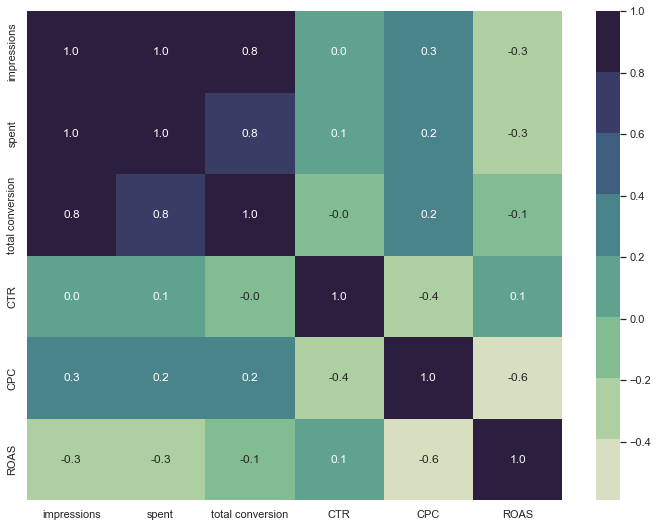

In [38]:
#heatmap to show relationship between variables
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (12,9))
sns.set()
sns.heatmap(columnselect[columnselect.columns[1:]].corr(),annot = True, fmt = ".1f",
            cmap = (sns.cubehelix_palette(8, start = .5, rot = -.75)))
plt.show()

#### key Insights

From the above heatmap, we can see that:
- impressions and total conversion have a strong positive correlation i.e the more the impressions recorded, the more the total conversion recorded.
- spent is totally dependent on total conversion.
- spent and impression has a strong positive correlation.


#### Recommendation

- Since there is a strong positive correlation between amount spent and total conversion, it is advised that more money be allocated to the marketing budget to increase conversion rate.

### 1. Linear Regression Algorithm

In [39]:
#importing required libraries for ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [40]:
Tempdf.head()

,campaign id,age,gender,interest,impressions,clicks,spent,total conversion,CTR,CPC,ROAS
0,3916,22,1,15,7350,1,1.43,2,0.01,143.0,1.40
1,3917,22,1,16,17861,2,1.82,2,0.01,91.0,1.10
2,3920,22,1,20,693,0,0.00,1,0.00,0.0,0.00
3,3928,22,1,28,4259,1,1.25,1,0.02,125.0,0.80
4,3928,22,1,28,4133,1,1.29,1,0.02,129.0,0.78


#### Define Predictor(y) and Input features(X)

Now, we want to build a linear regression model to predict the ROAS based on the input features of the dataset. The first thing to do while building a model is identifying the X and y variables from the datasets. X variable will be all the columns excluding the column to be predicted(ROAS) and y variable will be the column to be predicted(ROAS).  

In [41]:
#y is the input variable and y is the predictor. so, y is ROAS
#X is all the other columns after dropping the predictor which is ROAS 
#dropping the predictor column
X = Tempdf.drop('ROAS', axis = 1) 
y = Tempdf.ROAS

#### Split dataset into Test and Train data

Next, we have to split the data into training data and testing data in the ratio 80:20. The regression model will be trained with the training dataset and tested with the testing dataset.

We will use the train_test_split() function in scikit learn.

This function will split the dataset into 4 parts which are :X_train, X_test, y_train, and y_test.

In [42]:
#split data into test and train
#80% will be the training data while 20% will be the testing data
#X(training) and y(testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [43]:
#to check the shape of the data after splitting
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 10), (200, 10), (800,), (200,))

### Model Training

In [44]:
#lets fit the training data into our model
#1. create a variable, define an object df then fit the train and test data.
#2. the regressor.fit is to train the model using only the training data
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [45]:
#for every linear regression, we have the intercept and slope
#to retrieve the intercept,
print(regressor.intercept_)
#to retrieve the slope or coef,
print(regressor.coef_)

0.4782353386611383
[ 9.57928990e-06 -1.65936352e-02  8.53317231e-02 -2.35921346e-03
 -1.84651169e-07  2.20227706e-04 -1.04728774e-03  1.44955742e-02
  1.44589955e+01 -3.98109808e-04]


The result should be approximately 9.579, which means that for every one unit of change in the amount spent on ads,the change in the ROAS is about 9.58%.

### Model Testing

Now, its time to test/evaluate the model. We will be using the testing data here. LinearRegression() class provides a function score() which we will take the test sets as a parameter and gives a value that represents he accuracy level of the model with testing data. This value is the rsult of the R^2 which is usually between 0 and 1.

In [46]:
#check prediction score
regressor.score(X_test, y_test)

0.02885150432753114

The score is 0.028 which is just ~3% and this is not good.

In [47]:
y_pred = regressor.predict(X_test)
y_pred

In [48]:
#now, lets see the prediction on which th accuracy level is achieved.
y_test = np.array(list(y_test))
y_pred = np.array(y_pred)
df = pd.DataFrame({'Actual' : y_test.flatten(), 'Predicted' : y_pred.flatten()})
df

,Actual,Predicted
0,0.04,0.149358
1,0.07,0.194716
2,0.22,0.574551
3,0.04,0.223084
4,0.09,0.154169
...,...,...
195,0.11,0.149000
196,0.01,0.154393
197,2.04,0.299921
198,0.02,0.094225


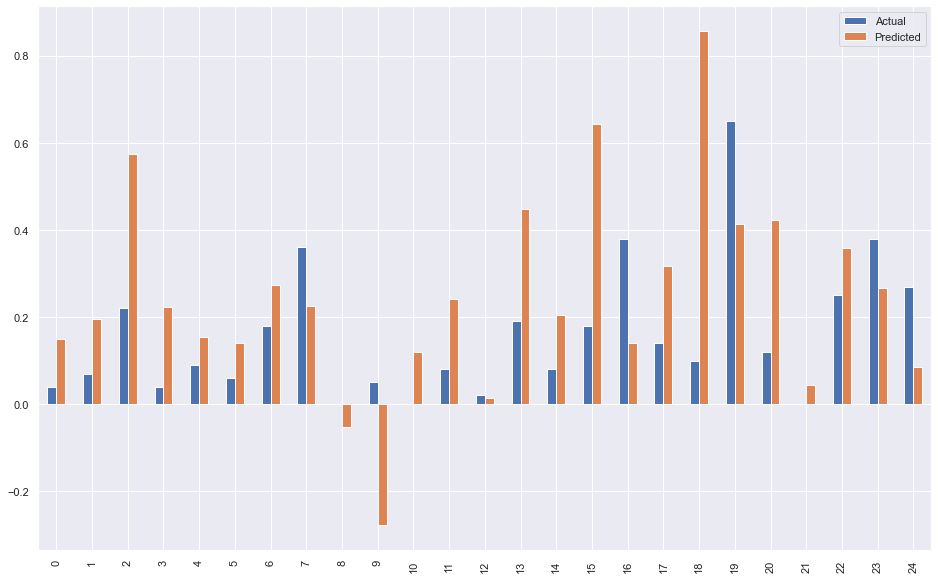

In [49]:
#Now, lets create a visual with the first 25 values.
df1 = df.head(25)
df1.plot(kind ='bar', figsize=(16,10))
#plt.grid(which='major', linestyle= '-', linewidth='0.8',colour='blue')
#plt.grid(which = 'major',linestyle = '-',linewidth = 0.8,colour = 'blue')
#plt.grid(colour = 'red',li
plt.show()

#### Key Insights

- The predicted results show a lot of inaccurate values, our errors should be minimal to have a better model. so we would like to calculate the accuracy

In [50]:
#lets calculate performance of the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2:', metrics.r2_score(y_true=y_test, y_pred=y_pred))

Mean Absolute Error: 0.2306608570894972
Mean Squared Error: 0.2718583351703818
Root Mean Squared Error: 0.5214003597720104
r2: 0.02885150432753114


#### Key Insights

- A value of 0 indicates no error or perfect predictions.
- Mean Absolute Error is 0.2307 in range of 1, around 0 is best and this is not close.
- The lower the Mean Squared Error and close to 0,the better, this model attained around 0.2719
- The model attained a r2 of 0.02885 which is much closer to 0 than 1. This means that the model doesnt fit the given data. A good R2 score should be close to 1. 

#### 2. Random Forest Algorithm

In [58]:
from sklearn.ensemble import RandomForestRegressor

In [59]:
#define the predictor and the input factors
#X is all columns excluding the predictor column
X = Tempdf.drop('ROAS', axis=1)
y= Tempdf.ROAS


In [60]:
# features_label = Tempdf.columns[1:]
# forest = RandomForestRegressor (n_estimators = 1000, random_state = 0, n_jobs = -1)
# forest.fit(X,y)
# importances = forest.feature_importances_
# indices = np.argsort(importances)[::-ndices[i]1]
# for i in range(X.shape[1]):
#     print("%2d) %-*s %f" % (i + 1, 30,features_label[i],importances[i]]))
    
    
features_label = df.columns[1:]
forest = RandomForestRegressor (n_estimators = 10000, random_state=0, n_jobs = -1)
forest.fit(X,y)
importances = forest.feature_importances_
indices = np. argsort(importances)[::-1]
for i in range(X.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, features_label[i],importances[indices[i]]))

 1) age                            0.579223
 2) gender                         0.194385
 3) interest                       0.116493
 4) impressions                    0.071521
 5) clicks                         0.014389
 6) spent                          0.013811
 7) total conversion               0.004504
 8) CTR                            0.002114
 9) CPC                            0.001860
10) ROAS                           0.001699


In [61]:
#lets train the algorithm using random forest using 10k trees
forest_regressor = RandomForestRegressor ()
forest_regressor.fit(X_train, y_train)

RandomForestRegressor()

In [62]:
from sklearn.model_selection import cross_val_score
cv_10_results = cross_val_score(forest_regressor, X, y, cv=10)
print(cv_10_results)

[0.79237763 0.93486476 0.73597367 0.97637535 0.99017008 0.93870923
 0.91007046 0.99618524 0.41685916 0.98390201]


In [63]:
#lets train the algorithm using random forest using 10k trees
forest_regressor = RandomForestRegressor (n_estimators = 1000, random_state = 0, n_jobs = -1)
forest_regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=0)

In [64]:
#now,lets test the model, predict on the X_test 229 rows and 19 columns
y_pred = forest_regressor.predict(X_test)

In [65]:
#now, lets see the prediction on which th accuracy level is achieved.
y_test = np.array(list(y_test))
y_pred = np.array(y_pred)
df = pd.DataFrame({'Actual' : y_test.flatten(), 'Predicted' : y_pred.flatten()})
df

,Actual,Predicted
0,0.04,0.03921
1,0.07,0.06048
2,0.22,0.21985
3,0.04,0.04040
4,0.09,0.08949
...,...,...
195,0.11,0.11390
196,0.01,0.01039
197,2.04,1.98130
198,0.02,0.02015


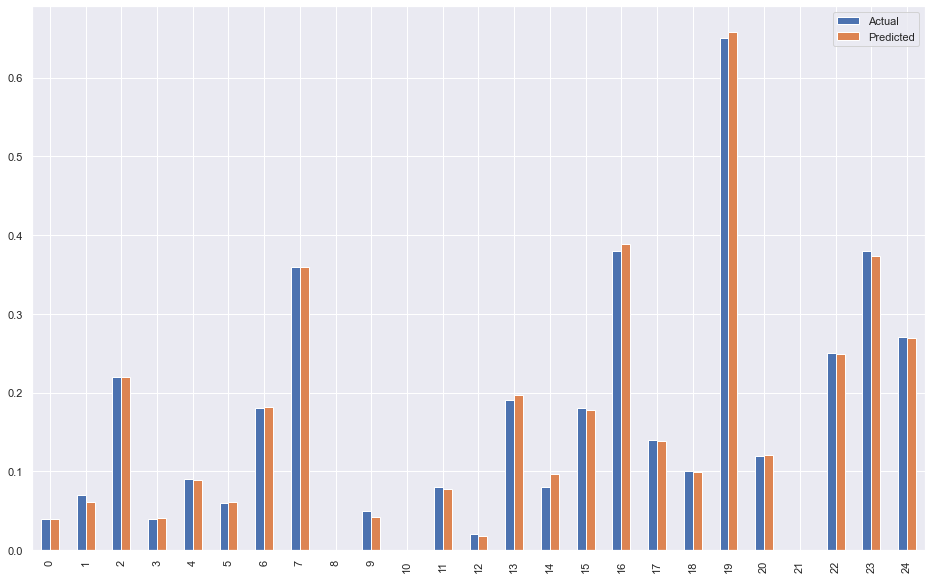

In [66]:
#Now, lets create a visual with the first 25 values.
df1 = df.head(25)
df1.plot(kind ='bar', figsize=(16,10))
#plt.grid(which='major', linestyle= '-', linewidth='0.8',colour='blue')
#plt.grid(which = 'major',linestyle = '-',linewidth = 0.8,colour = 'blue')
#plt.grid(colour = 'red',li
plt.show()

In [67]:
#lets calculate performance of the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2:', metrics.r2_score(y_true=y_test, y_pred=y_pred))

Mean Absolute Error: 0.0365231499999995
Mean Squared Error: 0.09023742591949936
Root Mean Squared Error: 0.30039544923234
r2: 0.677648506233385


#### Key Insights

- Mean Absolute Error is 0.0365 is close to 0. Any value around 0 is best.
- This model attained a Mean Squared Error of 0.0902 which is very close to 0. The lower the Mean Squared Error and close to 0,the better.
- The prediction is ~68% accurate since r^2 is 0.677.
- The Root Mean Squared Error is 0.30, which is less than 10% of the mean value of the percentage


The Random Forest Algorithm predicted more accurate values than  the Linear Regression Algorithm.